In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets

* 간단한 예제

In [ ]:
# 데이터 준비
X = 

# 모델 생성
model = svm.SVC()

# 모델 훈련
model.fit()

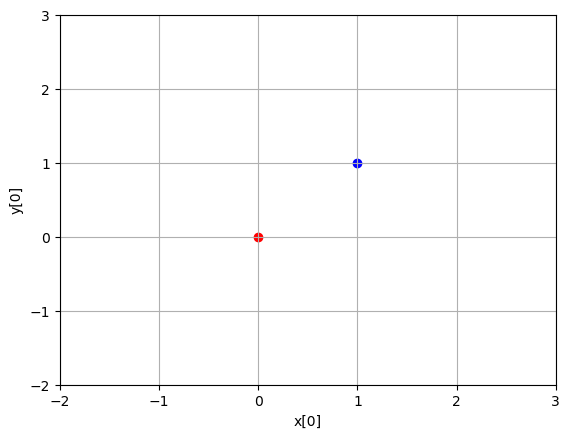

In [2]:
# 데이터 시각화
plt.scatter([0], [0], c='red')
plt.scatter([1], [1], c='blue')

plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.xlabel('x[0]')
plt.ylabel('y[0]')

plt.grid()
plt.show()

In [ ]:
# test data 예측
model.predict([[-1, -1]])

# test data 예측
model.predict([[2, 2]])

In [ ]:
# support vector 확인
model.support_vectors_

# support vector의 data index
model.support_

# class별 support vector의 개수
model.n_support_

* 실데이터 적용하기

In [8]:
# 데이터 준비
iris = datasets.load_iris()

# 모든 변수가 아닌 앞의 두 개의 변수 (꽃받침의 길이와 너비)만 가져오기
X = iris.data[:100, :2]
y = iris.target[:100]

# SVM regularization parameter
# C : svm 공식에 나오는 C와 반비례 (>> 원래 C가 클수록 더 작은 수의 support vector를 허용함.(hard margin))
C = 100

# 모델 생성 후 학습
model = svm.SVC(kernel='linear', C=C).fit(X, y)

# 결과 확인
print('='*20, 'RESULT', '='*20)
# support vector 확인
print('Support Vectors :', model.support_vectors_)
# support vector의 data index 확인
print("Support Vectors' index :", model.support_)
# 클래스별 support vectors의 개수
print(model.n_support_)

==================== RESULT ====================
Support Vectors : [[5.5 3.5]
 [4.5 2.3]
 [4.9 2.4]
 [5.4 3. ]]
Support Vectors' index : [36 41 57 84]
[2 2]


In [7]:
# 인덱스 36에 해당하는 데이터 가져오기
X[model.support_[0]]

array([5.5, 3.5])

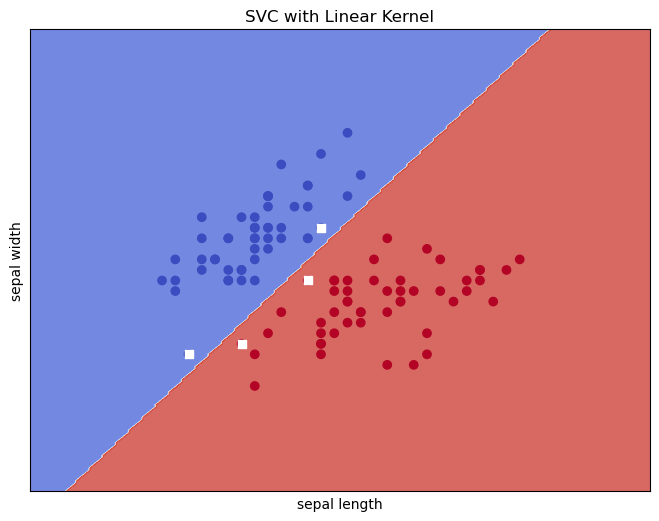

In [17]:
# SVC 시각화하기
plt.figure(figsize=(8, 6))

# 분류 경계선 만들기
# step size in the mesh
h = .02

# sepal length
X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# sepal width
X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

X1X1, X2X2 = np.meshgrid(np.arange(X1_min, X1_max, h), (np.arange(X2_min, X2_max, h)))

# np.c_ : 새로운 컬럼 만들어주기 (차원 확장시키기) / 배열을 열 단위로 연
# ravel : 2차원 배열을 1차원 배열으로 만들어주기
z = model.predict(np.c_[X1X1.ravel(), X2X2.ravel()])
# meshgrid 형태로 예측값을 재구성하기
z = z.reshape(X1X1.shape)

# 배경 만들기
# 결정 경계가 채워진 등고선 그림그리
plt.contourf(X1X1, X2X2, z, cmap=plt.cm.coolwarm, alpha=0.8)

# train data를 배경 위에 표시하기 - 꽃받침 길이 & 너비
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

# support vector를 배경 위에 표시하기
for idx in model.support_:
    plt.scatter(X[idx][0], X[idx][1], c='white', marker='s')

# 그래프 꾸미기
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.xlim(X1X1.min(), X1X1.max())
plt.ylim(X2X2.min(), X2X2.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC with Linear Kernel')

plt.show()

In [20]:
xx = np.array([[1, 2, 3],
               [4, 5, 6]])
xx # 2차원

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
xx.ravel() # 1차원

array([1, 2, 3, 4, 5, 6])

In [22]:
xx.flatten()

array([1, 2, 3, 4, 5, 6])

In [23]:
xx = np.array([1, 2, 3])
yy = np.array([4, 5, 6])
np.c_[xx, yy] # 1차원을 2차원으로 !

array([[1, 4],
       [2, 5],
       [3, 6]])

## SVM Kernel 비교
* iris

In [24]:
C = 1.0

# SVC
SVC = svm.SVC(kernel='linear', C=C).fit(X, y)

# SVC (radial kernel)
rbf_SVC = svm.SVC(kernel='rbf', gamma=1.5, C=C).fit(X, y)

# SVC (polynomial kernel)
poly_SVC = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y) # degree : 차원

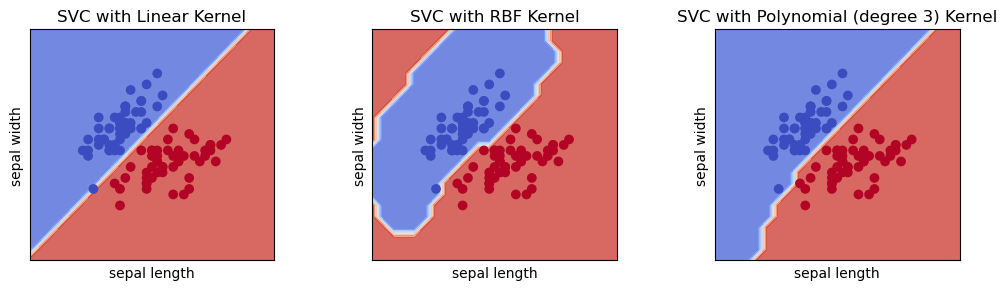

In [25]:
# SVC 시각화
plt.figure(figsize=(12, 3))

h = 0.2

# sepal length
X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# sepal width
X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

X1X1, X2X2 = np.meshgrid(np.arange(X1_min, X1_max, h), (np.arange(X2_min, X2_max, h)))

titles = ['SVC with Linear Kernel',
          'SVC with RBF Kernel', 
          'SVC with Polynomial (degree 3) Kernel']

for i, model in enumerate((SVC, rbf_SVC, poly_SVC)):
    plt.subplot(1, 3, i+1)
    # 그래프 미세조정
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    # 예측하기
    z = model.predict(np.c_[X1X1.ravel(), X2X2.ravel()]).reshape(X1X1.shape)
    # 배경 만들기
    plt.contourf(X1X1, X2X2, z, cmap=plt.cm.coolwarm, alpha=0.8)
    # 꽃받침 길이, 너비 산점도로 넣어주기
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    # 그래프 꾸미기
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.xlim(X1X1.min(), X1X1.max())
    plt.ylim(X2X2.min(), X2X2.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()